In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from skimage import exposure
plt.rcParams["figure.figsize"] = (11,7)
import cv2
import time
import math
from random import randint

In [32]:
win_size = (64,128) 
block_size = (16,16)
block_stride = (8,8)
cell_size = (8,8)
nbins = 9
deriv_aperture = 1
win_sigma = -1
histogram_norm_type = 0
l2_hys_threshold = 0.2
gamma_correction = 0
nlevels = 64
hog = cv2.HOGDescriptor(win_size,block_size,block_stride,cell_size,nbins,deriv_aperture,win_sigma,
                        histogram_norm_type,l2_hys_threshold,gamma_correction,nlevels)

In [30]:
def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()
C_par = [0.001,0.002,0.007,0.01,0.02,0.04,0.1,1]
for i in C_par:
    print((time_since(start)))

0m 0s
0m 0s
0m 0s
0m 0s
0m 0s
0m 0s
0m 0s
0m 0s


<Figure size 3600x2160 with 0 Axes>

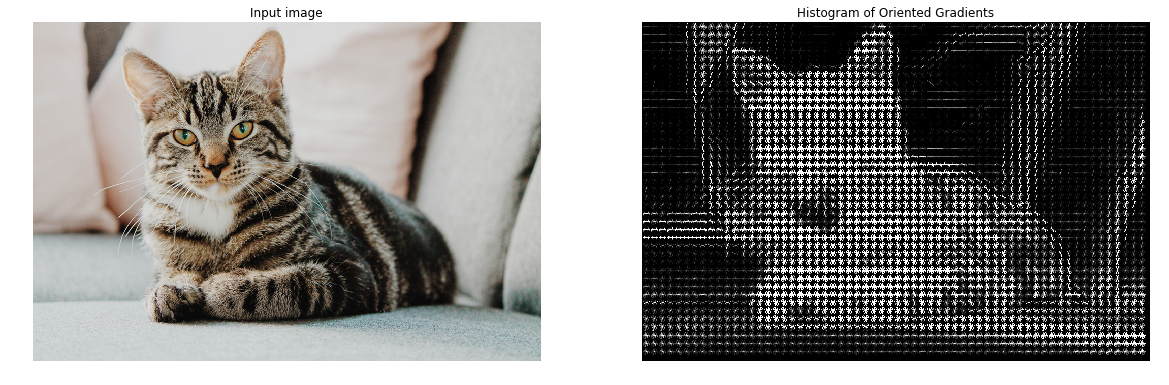

In [8]:
cat = plt.imread('/home/leonid/Рабочий стол/cat.jpeg',)
plt.figure(figsize=(50,30))
fd, hog_image = hog(cat, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True,block_norm="L2")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(cat, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 2))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [46]:
vectors = []
f = open('/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/pos.lst')
for line in f:
    
    
    path = '/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/'+line[6:-1]
    fd = hog.compute(cv2.imread(path)[15:143,15:79])
    vectors.append(fd)
vectorspos =  np.asarray(vectors)
vectorspos = vectorspos[:,:,0]

vectorsneg = []
HIEGHT = 128
WIDTH = 64
f = open('/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/neg.lst')
for line in f:
    path = '/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/'+line[6:-1]
    raw = cv2.imread(path)
    h, w, c = raw.shape
    chuncks = []
    for i in range(h//HIEGHT):
        for j in range(w//WIDTH):
            chuncks.append(raw[i*HIEGHT:(i+1)*(HIEGHT),j*WIDTH:(j+1)*WIDTH])
    
    chuncks = np.asarray(chuncks)
    for i in range(chuncks.shape[0]):
        fd = hog.compute(chuncks[i])
        vectorsneg.append(fd)
    
vectorsneg = np.asarray(vectorsneg)   
np.random.shuffle(vectorsneg)
vectorsneg = vectorsneg[0:12180,:,0]

In [47]:
vectorsneg.shape

(12180, 3780)

In [48]:
vectorspos.shape

(2416, 3780)

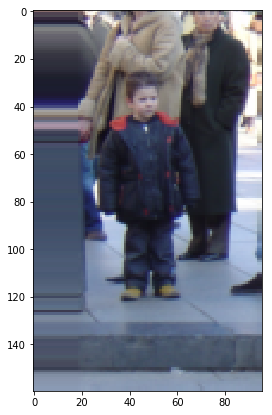

In [28]:
img = cv2.imread('/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/pos/crop001001c.png')
fd = hog.compute(img[15:143,15:79])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [30]:
imtest.shape[0]

128

In [5]:
vectorsneg.shape

(12180, 3780, 1)

In [36]:
vectorspos.shape

(2416, 3780, 1)

In [42]:
vectorspos[0,1,0]

0.088113196

### Here goes classiffication

In [34]:
from sklearn.svm import SVC

### Тестирование

In [35]:
vectorsPosTest = []
f = open('/home/leonid/Загрузки/INRIAPerson/test_64x128_H96/pos.lst')
for line in f:
    path = '/home/leonid/Загрузки/INRIAPerson/test_64x128_H96/'+line[5:-1]
    fd = hog.compute(cv2.imread(path)[:128,0:64])
    vectorsPosTest.append(fd)
vectorsPosTest = np.asanyarray(vectorsPosTest)

vectorsNegTest = []
HIEGHT = 128
WIDTH = 64
f = open('/home/leonid/Загрузки/INRIAPerson/test_64x128_H96/neg.lst')
for line in f:
    path = '/home/leonid/Загрузки/INRIAPerson/test_64x128_H96/'+line[5:-1]
    raw = cv2.imread(path)
    h, w, c = raw.shape
    chuncks = []
    for i in range(h//HIEGHT):
        for j in range(w//WIDTH):
            chuncks.append(raw[i*HIEGHT:(i+1)*(HIEGHT),j*WIDTH:(j+1)*WIDTH])
    
    chuncks = np.asarray(chuncks)
    for i in range(chuncks.shape[0]):
        fd = hog.compute(chuncks[i])
        vectorsNegTest.append(fd)
    
vectorsNegTest = np.asarray(vectorsNegTest)

In [9]:
vectorsPosTest.shape

(1132, 3780, 1)

In [36]:
hardneg = []
HIEGHT = 128
WIDTH = 64
f = open('/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/neg.lst')
for line in f:
    path = '/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/'+line[6:-1]
    raw = cv2.imread(path)
    h, w, c = raw.shape
    randChuncks = []
    h1 = h-HIEGHT-1
    w1 = w-WIDTH-1
    for i in range(30):
        if w1 > 0 : hr = randint(0,h1)
        if w1 > 0 : wr = randint(0,w1)
        randChuncks.append(raw[hr:hr+HIEGHT,wr:wr+WIDTH])
    randChuncks = np.asarray(randChuncks)
    for i in range(randChuncks.shape[0]):
        fd = hog.compute(randChuncks[i])
        hardneg.append(fd)
    
hardneg = np.asarray(hardneg)



In [37]:
testvectors = np.concatenate((vectorsPosTest,vectorsNegTest),axis=0)
TEST = pd.DataFrame(data = testvectors[:,:,0])
YTEST = np.concatenate((np.asarray([1]*vectorsPosTest.shape[0]),np.asarray([-1]*vectorsNegTest.shape[0])),axis=0)

## Построение DET кривой

In [61]:
C_par = [0.001,0.002,0.007,0.01,0.02,0.04,0.1,1]

In [62]:
scores = []
vectorsnegNothard = vectorsneg

In [63]:
vectorsneg.shape

(12451, 3780)

In [64]:
start = time.time()
for c in C_par:
    hard = []
    svm = SVC(kernel="linear",C=c)
    print("C:%f\nProcessing..." % (c))
    print((time_since(start)))
    vectors = np.concatenate((vectorspos,vectorsneg),axis=0)
    y = np.concatenate((np.asarray([1]*vectorspos.shape[0]),np.asarray([-1]*vectorsneg.shape[0])),axis=0)
    X = pd.DataFrame(data = vectors)
    y = pd.DataFrame(data = y)
    svm.fit(X,y)
    predict = svm.predict(hardneg[:,:,0])
    for i in range(predict.size):
        if predict[i]==1: hard.append(hardneg[i,:,0])
    hard = np.asarray(hard)
    vectorsneg = np.concatenate((vectorsneg,hard),axis=0)
    print("C:%f  Hard:%d" % (c,hard.shape[0]))
    print((time_since(start)))
    y = np.concatenate((np.asarray([1]*vectorspos.shape[0]),np.asarray([-1]*vectorsneg.shape[0])),axis=0)
    vectors = np.concatenate((vectorspos,vectorsneg),axis=0)
    X = pd.DataFrame(data = vectors)
    y = pd.DataFrame(data = y)
    
    svm.fit(X,y)
    predict = svm.predict(TEST)
    r = recall_score(YTEST, predict)
    m = 1-r
    scores.append(m)
    k = 0
    for i in range(predict.size):
        if YTEST[i]==-1 and predict[i]==1:k = k + 1
    scores.append(k) 
    vectorsneg = vectorsnegNothard
    
    

C:0.001000
Processing...
0m 0s


/home/leonid/jupyter/env/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:0.001000  Hard:77
10m 17s
C:0.002000
Processing...
15m 25s
C:0.002000  Hard:67
23m 23s
C:0.007000
Processing...
27m 21s
C:0.007000  Hard:46
32m 45s
C:0.010000
Processing...
35m 28s
C:0.010000  Hard:50
40m 21s
C:0.020000
Processing...
42m 49s
C:0.020000  Hard:64
46m 51s
C:0.040000
Processing...
48m 56s
C:0.040000  Hard:90
52m 41s
C:0.100000
Processing...
54m 36s
C:0.100000  Hard:117
57m 45s
C:1.000000
Processing...
59m 26s
C:1.000000  Hard:267
62m 23s


In [70]:
YTEST.shape

(9775,)

In [65]:
scores = np.asarray(scores)
np.save('scores1val', scores)

In [3]:
scores = np.load('scores1val.npy')

In [4]:
MissRate = scores[::2]
FalsePositive = scores[1::2]

In [5]:
MissRate

array([0.16784452, 0.1360424 , 0.10335689, 0.09805654, 0.09275618,
       0.09982332, 0.10600707, 0.12897527])

In [6]:
FalsePositive1 = np.multiply(FalsePositive,1.023)

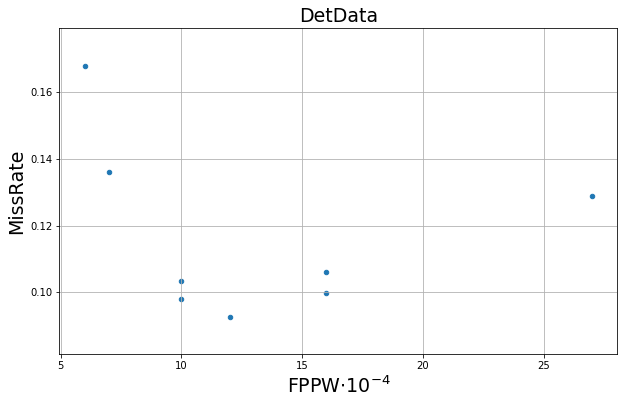

In [7]:
#x = arange(4,50)
#slope, intercept, r_value, p_value, std_err = stats.linregress(T,Nu)
plt.rcParams["figure.figsize"] = (10,6)

#sns.lmplot(x="x", y="y", data=Data3,
 #          robust=True, ci=None, scatter_kws={"s": 80});
plt.scatter(FalsePositive,MissRate,s=20)
#plt.plot(FalsePositive, MissRate)
#pylab.xlim([285,314])
#pylab.ylim([0,930])
#plt.plot(x,x*slope+intercept,label= r'y=0,96x-0,42')

#plt.errorbar(T, Nu, xerr=std_err, yerr = 1,fmt='none',ecolor="black");
plt.xlabel(r'FPPW$\cdot 10^{-4}$', fontsize=19)
plt.ylabel(r'MissRate', fontsize=19)
plt.title(r'DetData',fontsize=19)
#plt.legend()
plt.grid()

## Scikit-image

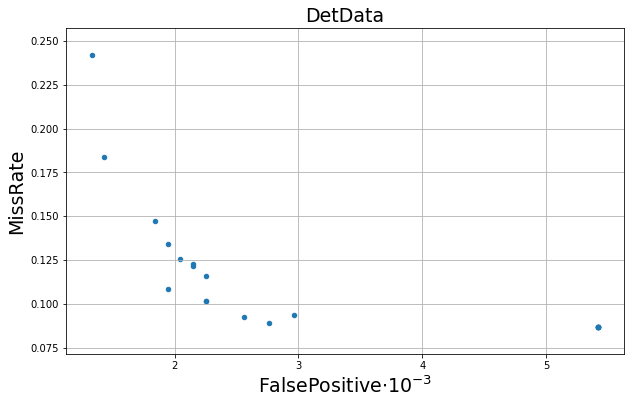

In [23]:
#x = arange(4,50)
#slope, intercept, r_value, p_value, std_err = stats.linregress(T,Nu)
plt.rcParams["figure.figsize"] = (10,6)

#sns.lmplot(x="x", y="y", data=Data3,
 #          robust=True, ci=None, scatter_kws={"s": 80});
plt.scatter(FalsePositive,MissRate,s=20)
#plt.plot(FalsePositive, MissRate)
#pylab.xlim([285,314])
#pylab.ylim([0,930])
#plt.plot(x,x*slope+intercept,label= r'y=0,96x-0,42')

#plt.errorbar(T, Nu, xerr=std_err, yerr = 1,fmt='none',ecolor="black");
plt.xlabel(r'FalsePositive$\cdot 10^{-3}$', fontsize=19)
plt.ylabel(r'MissRate', fontsize=19)
plt.title(r'DetData',fontsize=19)
#plt.legend()
plt.grid()